# TEST RESULT

In [20]:
from pathlib import Path
import json
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
category = 'milk'

In [22]:
BASE = Path(f'/workspace/detect-me/product_classifier/saved_models/') /category

!ls $BASE

densenet121  efficientnetb7	  resnet152v2  resnet50v2	 test_result
densenet201  inception_resnet_v2  resnet50     tensorboard_logs  vgg16


In [23]:
list_modesl = ['densenet121',
'efficientnetb7',
'resnet152v2',
'resnet50v2',
'densenet201',
'inception_resnet_v2',
'resnet50',
'vgg16',
]

test_results = (BASE / 'test_result').glob('*.json')
data_dict = dict() 
for filep in test_results:
    with open(filep) as file:
        data = json.load(file)
    data_dict[filep.stem] = data

dataframe_testResult = pd.DataFrame(data_dict).T.reset_index()
dataframe_testResult = \
        dataframe_testResult.rename({'index' : 'tag'},
                            axis=1)

# dataframe_testResult['top_3_acc'].\
#     fillna(dataframe_testResult['top_3_accuracy'],
#           inplace=True)

# dataframe_testResult = dataframe_testResult.drop('top_3_accuracy', axis=1)

# (?<=Freeze)\d+(?=:?<)

dataframe_testResult.head()

,tag,loss,accuracy,top_3_acc,PRCN-tr-0.5,PRCN-tr-0.9,recall-tr--0.5,recall-tr--0.9,length_classes
0,DenseNet121---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.565890,0.869930,0.949650,0.910045,0.956848,0.848951,0.713287,NaN
1,RESNET152V2---(Freeze-200)-(lr-0.0004-adam)-(o...,0.540419,0.903497,0.967832,0.917261,0.958009,0.899301,0.861538,NaN
2,RESNET152V2---(Freeze-200)-(lr-0.0004-adam)-(o...,0.405550,0.897820,0.968665,0.927864,0.980424,0.893733,0.818801,NaN
3,DenseNet121---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.397649,0.916780,0.972715,0.932394,0.976038,0.903138,0.833561,NaN
4,RESNET152V2---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.342137,0.937063,0.977622,0.951567,0.981453,0.934266,0.888112,NaN


In [24]:
dataframe_testResult['tag'][0]

'DenseNet121---(Freeze-0)-(lr-0.0008-adam)-(opt_cb-cosine_learning_rate_decay)-(epoch-50)-(batch-32)-(dropout-0.0)-FREEZE_0__2021-Aug-23----224325-(number_of_epochs_it_ran-12)-(count_params-7037504)'

In [25]:
patterns = [('freeze', '(?<=Freeze-)\d+'),
           ('lr' , '(?<=lr-)[\d|.]+'),
           ('dropout' , '(?<=dropout-)[\d|.]+'),
           ('epochs_it_ran' , '(?<=epochs_it_ran-)\d+'),
           ('tag_HMS' , '(?<=----)\d+'),
           ('modelname' , '(\w+)-{3}'),
           ]

for (n , p) in patterns:
    if n == 'modelname':
        group = 1
    else:
        group=0
    dataframe_testResult.loc[:,n] =\
        dataframe_testResult['tag'].\
                apply(lambda x : re.search(p,x).group(group) if re.search(p,x) else np.nan)

# dataframe_testResult =\
#     dataframe_testResult.assign(
#             modelname = dataframe_testResult.tag.apply(
#                                     lambda x : re.match('([a-zA-Z]+)-{3}',x).group(1) 
#                                                 if re.match('([a-zA-Z]+)-{3}',x) 
#                                                 else np.nan)
# )

# dataframe_testResult['tag_HMS'].duplicated().sum()

dataframe_testResult.head(1)

,tag,loss,accuracy,top_3_acc,PRCN-tr-0.5,PRCN-tr-0.9,recall-tr--0.5,recall-tr--0.9,length_classes,freeze,lr,dropout,epochs_it_ran,tag_HMS,modelname
0,DenseNet121---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.56589,0.86993,0.94965,0.910045,0.956848,0.848951,0.713287,NaN,0,0.0008,0.0,12,224325,DenseNet121


In [26]:
dataframe_testResult = dataframe_testResult.assign(f1_score = ((2*dataframe_testResult['recall-tr--0.9']*dataframe_testResult['PRCN-tr-0.9'])/
(dataframe_testResult['recall-tr--0.9'] + dataframe_testResult['PRCN-tr-0.9'])))

In [27]:
dataframe_testResult

,tag,loss,accuracy,top_3_acc,PRCN-tr-0.5,PRCN-tr-0.9,recall-tr--0.5,recall-tr--0.9,length_classes,freeze,lr,dropout,epochs_it_ran,tag_HMS,modelname,f1_score
0,DenseNet121---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.565890,0.869930,0.949650,0.910045,0.956848,0.848951,0.713287,NaN,0,0.0008,0.0,12,224325,DenseNet121,0.817308
1,RESNET152V2---(Freeze-200)-(lr-0.0004-adam)-(o...,0.540419,0.903497,0.967832,0.917261,0.958009,0.899301,0.861538,NaN,200,0.0004,0.1,22,230559,RESNET152V2,0.907216
2,RESNET152V2---(Freeze-200)-(lr-0.0004-adam)-(o...,0.405550,0.897820,0.968665,0.927864,0.980424,0.893733,0.818801,NaN,200,0.0004,0.1,19,000119,RESNET152V2,0.892353
3,DenseNet121---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.397649,0.916780,0.972715,0.932394,0.976038,0.903138,0.833561,NaN,0,0.0008,0.0,26,121943,DenseNet121,0.899191
4,RESNET152V2---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.342137,0.937063,0.977622,0.951567,0.981453,0.934266,0.888112,NaN,0,0.0008,0.2,22,181250,RESNET152V2,0.932452
5,DenseNet201---(Freeze-0)-(lr-0.001-adam)-(opt_...,0.348906,0.935664,0.983217,0.945946,0.972350,0.930070,0.885315,NaN,0,0.001,0.4,27,193528,DenseNet201,0.926794
6,INCEPTION_RES---(Freeze-20)-(lr-0.002-adam)-(o...,0.300533,0.934266,0.981818,0.949857,0.968847,0.927273,0.869930,NaN,20,0.002,0.4,25,211441,INCEPTION_RES,0.916728
7,INCEPTION_RES---(Freeze-200)-(lr-0.004-adam)-(...,0.323443,0.920280,0.972028,0.930836,0.983871,0.903497,0.853147,NaN,200,0.004,0.0,20,010930,INCEPTION_RES,0.913858
8,INCEPTION_RES---(Freeze-400)-(lr-0.008-adam)-(...,0.382644,0.920280,0.965035,0.938395,0.968750,0.916084,0.867133,NaN,400,0.008,0.0,21,122010,INCEPTION_RES,0.915129
9,EfficientNetB7---(Freeze-0)-(lr-0.0005-adam)-(...,0.455230,0.883916,0.970629,0.896700,0.958472,0.874126,0.806993,NaN,0,0.0005,0.3,20,131023,EfficientNetB7,0.876234


In [28]:

# sns.set_theme(style="whitegrid")
# custom_params = {"axes.spines.right": True, "axes.spines.top": True}
# sns.set_theme(style="ticks", rc=custom_params)

sns.set_theme(style="whitegrid", palette="pastel")
def plot_rel(col):
    # cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    with sns.plotting_context(rc={"legend.fontsize":15,
                                 'legend.title_fontsize' : 18}):
        g = sns.relplot(
            data=dataframe_testResult,
            x="modelname",
            y=col,
            hue="modelname",
            s=500,
    #         size="dropout",
            height=6, aspect=2.4, alpha=0.8,
    #         sizes=,
        )
        # g.set(xscale="log", yscale="log")
        g.ax.xaxis.grid(True, "minor", linewidth=.25)
        g.ax.yaxis.grid(True, "minor", linewidth=.25)
        g.ax.set_xlabel('')
        g.ax.set_ylabel('f1_score', rotation=90, fontsize=15,)
    #     plt.xticks(rotation = 90)
        g.ax.set_xticklabels(g.ax.get_xticklabels() , rotation=90 ) 
        g.despine(left=True, bottom=True)
#         g.savefig("output.png",quality=100)
    return g

<ipython-input-28-b9731297766d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(g.ax.get_xticklabels() , rotation=90 )


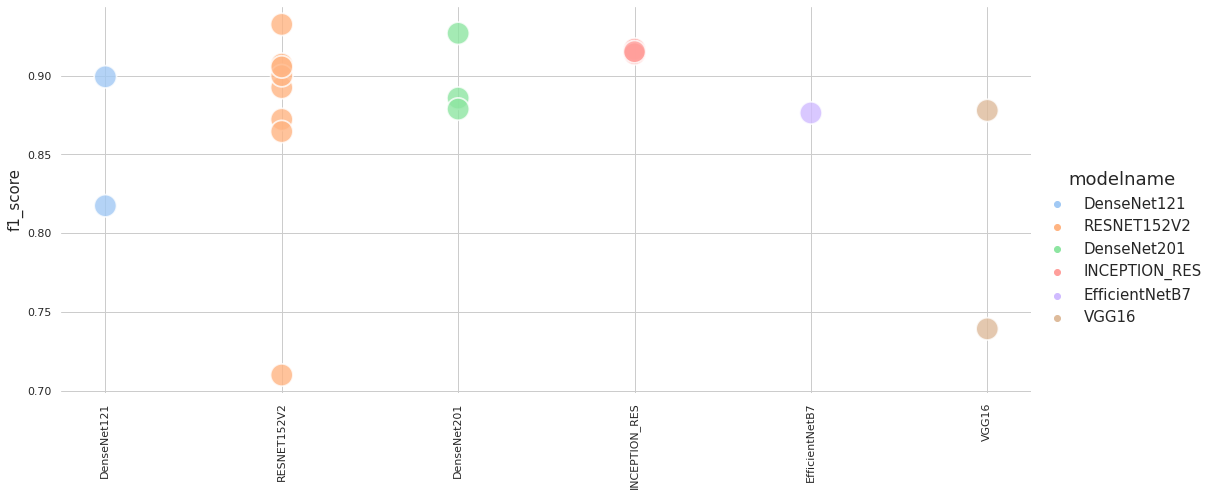

In [29]:
pp = plot_rel('f1_score')

<ipython-input-28-b9731297766d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(g.ax.get_xticklabels() , rotation=90 )


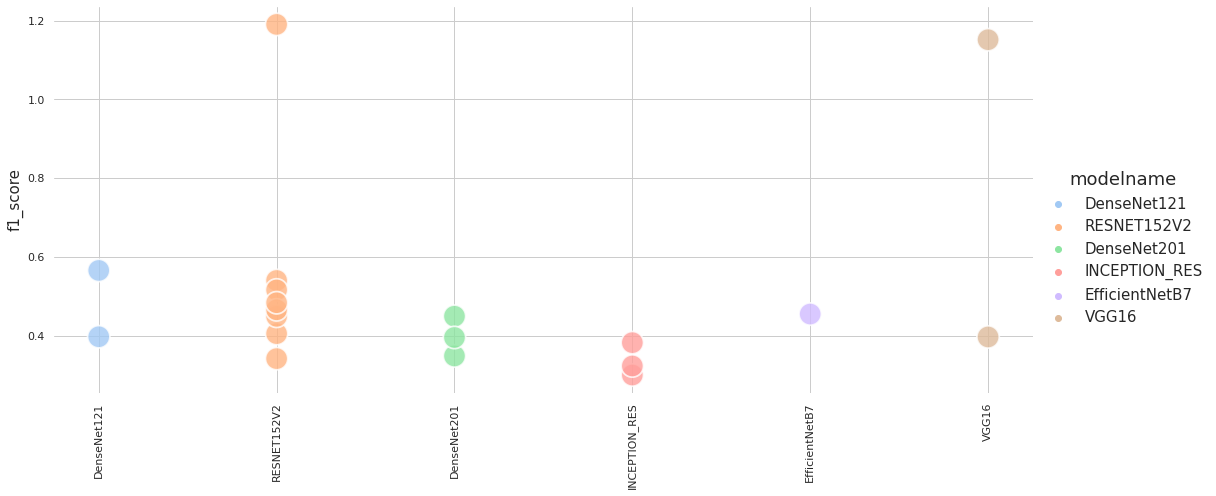

In [30]:
plot_rel('loss')

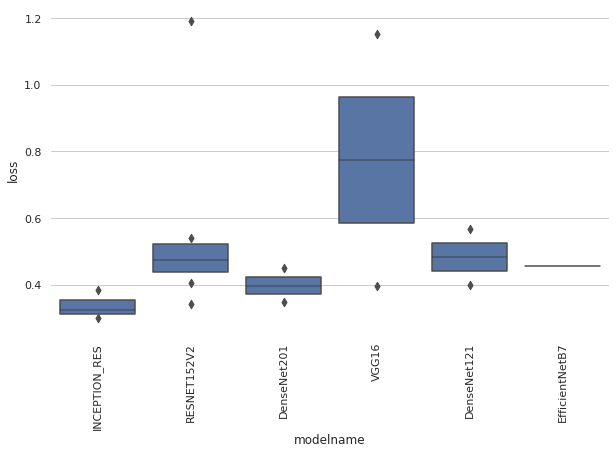

In [31]:
orders = dataframe_testResult.groupby('modelname').loss.min().sort_values(ascending=True).index.values

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="modelname", y="loss",
              color="b", order=orders,
              scale="linear",
              data=dataframe_testResult)
ax.set_xticklabels(ax.get_xticklabels() , rotation=90 ) 
sns.despine(left=True, bottom=True)

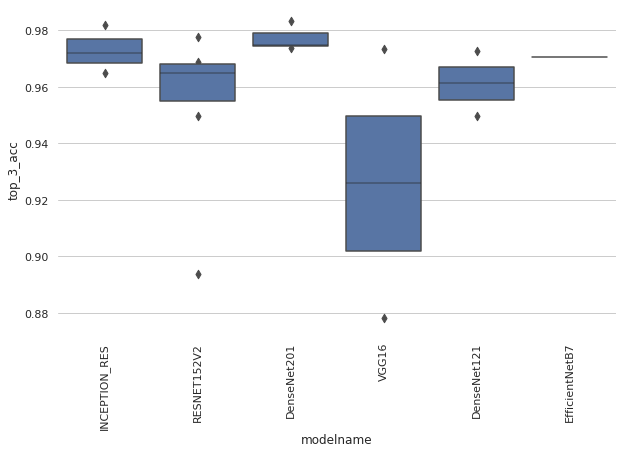

In [32]:
# sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="modelname", y="top_3_acc",
              color="b", order=orders,
              scale="linear",
              data=dataframe_testResult)
ax.set_xticklabels(ax.get_xticklabels() , rotation=90 ) 
sns.despine(left=True, bottom=True)

In [38]:
dataframe_testResult.sort_values('PRCN-tr-0.9')

,tag,loss,accuracy,top_3_acc,PRCN-tr-0.5,PRCN-tr-0.9,recall-tr--0.5,recall-tr--0.9,length_classes,freeze,lr,dropout,epochs_it_ran,tag_HMS,modelname,f1_score
13,RESNET152V2---(Freeze-0)-(lr-0.001-adam)-(opt_...,1.190119,0.735664,0.893706,0.788162,0.927765,0.707692,0.574825,NaN,0,0.001,0.2,56,225713,RESNET152V2,0.709845
14,VGG16---(Freeze-0)-(lr-0.001-adam)-(opt_cb-cos...,1.151292,0.746853,0.878322,0.817750,0.941558,0.721678,0.608392,NaN,0,0.001,0.2,50,214829,VGG16,0.739167
12,DenseNet201---(Freeze-40)-(lr-0.002-adam)-(epo...,0.449693,0.903967,0.974948,0.922747,0.956416,0.897704,0.824635,NaN,40,0.002,0.0,19,023218,DenseNet201,0.885650
0,DenseNet121---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.565890,0.869930,0.949650,0.910045,0.956848,0.848951,0.713287,NaN,0,0.0008,0.0,12,224325,DenseNet121,0.817308
1,RESNET152V2---(Freeze-200)-(lr-0.0004-adam)-(o...,0.540419,0.903497,0.967832,0.917261,0.958009,0.899301,0.861538,NaN,200,0.0004,0.1,22,230559,RESNET152V2,0.907216
9,EfficientNetB7---(Freeze-0)-(lr-0.0005-adam)-(...,0.455230,0.883916,0.970629,0.896700,0.958472,0.874126,0.806993,NaN,0,0.0005,0.3,20,131023,EfficientNetB7,0.876234
17,DenseNet201---(Freeze-40)-(lr-0.002-adam)-(epo...,0.395813,0.903727,0.973602,0.922953,0.968224,0.892857,0.804348,480.0,40,0.002,0.0,21,142455,DenseNet201,0.878711
8,INCEPTION_RES---(Freeze-400)-(lr-0.008-adam)-(...,0.382644,0.920280,0.965035,0.938395,0.968750,0.916084,0.867133,NaN,400,0.008,0.0,21,122010,INCEPTION_RES,0.915129
6,INCEPTION_RES---(Freeze-20)-(lr-0.002-adam)-(o...,0.300533,0.934266,0.981818,0.949857,0.968847,0.927273,0.869930,NaN,20,0.002,0.4,25,211441,INCEPTION_RES,0.916728
11,RESNET152V2---(Freeze-66)-(lr-0.0008-adam)-(ep...,0.516488,0.881119,0.949650,0.914671,0.970840,0.854545,0.791608,NaN,66,0.0008,0.0,18,175254,RESNET152V2,0.872111


In [33]:
sorted_recall = dataframe_testResult.sort_values(['recall-tr--0.9', 'PRCN-tr-0.9' ], ascending=False)
tag = sorted_recall.head(1)['tag_HMS'].item()
mname = sorted_recall.head(1)['modelname'].item()

In [34]:
sorted_recall.head(5)

,tag,loss,accuracy,top_3_acc,PRCN-tr-0.5,PRCN-tr-0.9,recall-tr--0.5,recall-tr--0.9,length_classes,freeze,lr,dropout,epochs_it_ran,tag_HMS,modelname,f1_score
4,RESNET152V2---(Freeze-0)-(lr-0.0008-adam)-(opt...,0.342137,0.937063,0.977622,0.951567,0.981453,0.934266,0.888112,NaN,0,0.0008,0.2,22,181250,RESNET152V2,0.932452
5,DenseNet201---(Freeze-0)-(lr-0.001-adam)-(opt_...,0.348906,0.935664,0.983217,0.945946,0.972350,0.930070,0.885315,NaN,0,0.001,0.4,27,193528,DenseNet201,0.926794
6,INCEPTION_RES---(Freeze-20)-(lr-0.002-adam)-(o...,0.300533,0.934266,0.981818,0.949857,0.968847,0.927273,0.869930,NaN,20,0.002,0.4,25,211441,INCEPTION_RES,0.916728
8,INCEPTION_RES---(Freeze-400)-(lr-0.008-adam)-(...,0.382644,0.920280,0.965035,0.938395,0.968750,0.916084,0.867133,NaN,400,0.008,0.0,21,122010,INCEPTION_RES,0.915129
1,RESNET152V2---(Freeze-200)-(lr-0.0004-adam)-(o...,0.540419,0.903497,0.967832,0.917261,0.958009,0.899301,0.861538,NaN,200,0.0004,0.1,22,230559,RESNET152V2,0.907216


In [83]:
# def get_best_classifier(path_to_test_result:str,
#                         metric=None):
#     test_results = (path_to_test_result / 'test_result').glob('*.json')
#     data_dict = dict() 
#     for filep in test_results:
#         with open(filep) as file:
#             data = json.load(file)
#         data_dict[filep.stem] = data

#     dataframe_testResult = pd.DataFrame(data_dict).T.reset_index()
#     dataframe_testResult = \
#             dataframe_testResult.rename({'index' : 'tag'},
#                                 axis=1)
#     patterns = [('freeze', '(?<=Freeze-)\d+'),
#                ('lr' , '(?<=lr-)[\d|.]+'),
#                ('dropout' , '(?<=dropout-)[\d|.]+'),
#                ('epochs_it_ran' , '(?<=epochs_it_ran-)\d+'),
#                ('tag_HMS' , '(?<=----)\d+'),
#                ('modelname' , '(\w+)-{3}'),
#                ]

#     for (n , p) in patterns:
#         if n == 'modelname':
#             group = 1
#         else:
#             group=0
#         dataframe_testResult.loc[:,n] =\
#             dataframe_testResult['tag'].\
#                     apply(lambda x : re.search(p,x).group(group) if re.search(p,x) else np.nan)


#     dataframe_testResult.head(1)

#     prec_at90 = dataframe_testResult['PRCN-tr-0.9']
#     recall_at90 = dataframe_testResult['recall-tr--0.9']
#     dataframe_testResult = \
#         dataframe_testResult.assign(
#             f1_score = (2*(recall_at90*prec_at90)/
#                                (recall_at90+prec_at90)
#                       ))

#     dataframe_testResult = dataframe_testResult.sort_values(['f1_score'], ascending=False)
#     dataframe_testResult.f1score = dataframe_testResult.f1score.fillna(0)
#     best_model_baseon_testset = dataframe_testResult.head(1)
    
#     tag= best_model_baseon_testset['tag_HMS'].item()
#     print('best model')
#     print(best_model_baseon_testset)
#     root_tree = (path_to_test_result).rglob('*')

#     df = pd.DataFrame(root_tree)

#     df.columns = ['fullpath']

#     df = pd.concat([pd.DataFrame((df['fullpath'].apply(lambda x: x.parts)).to_list()),
#               df],axis=1)
# #     print(tag)
#     model_path = df[(df[8] == 'saved_model.pb') & df[7].str.contains(tag)]['fullpath']

#     model_path = model_path.item().parent
#     return model_path

In [35]:
def get_best_classifier(path_to_test_result:str,
                        metric=None):
    test_results = (path_to_test_result / 'test_result').glob('*.json')
    data_dict = dict() 
    for filep in test_results:
        with open(filep) as file:
            data = json.load(file)
        data_dict[filep.stem] = data

    dataframe_testResult = pd.DataFrame(data_dict).T.reset_index()
    dataframe_testResult = \
            dataframe_testResult.rename({'index' : 'tag'},
                                axis=1)
    patterns = [('freeze', '(?<=Freeze-)\d+'),
               ('lr' , '(?<=lr-)[\d|.]+'),
               ('dropout' , '(?<=dropout-)[\d|.]+'),
               ('epochs_it_ran' , '(?<=epochs_it_ran-)\d+'),
               ('tag_HMS' , '(?<=----)\d+'),
               ('modelname' , '(\w+)-{3}'),
               ]

    for (n , p) in patterns:
        if n == 'modelname':
            group = 1
        else:
            group=0
        dataframe_testResult.loc[:,n] =\
            dataframe_testResult['tag'].\
                    apply(lambda x : re.search(p,x).group(group) if re.search(p,x) else np.nan)


    dataframe_testResult.head(1)

    prec_at90 = dataframe_testResult['PRCN-tr-0.9']
    recall_at90 = dataframe_testResult['recall-tr--0.9']
    dataframe_testResult = \
        dataframe_testResult.assign(
            f1score = (2*(recall_at90*prec_at90)/
                               (recall_at90+prec_at90)
                      ))
    dataframe_testResult.f1score = dataframe_testResult.f1score.fillna(0)

#     import pdb;pdb.set_trace()
    dataframe_testResult = dataframe_testResult.sort_values(['f1score'], ascending=False)
    
    best_model_baseon_testset = dataframe_testResult.head(1)
    
    tag= best_model_baseon_testset['tag_HMS'].item()
    print('best model')
    print(best_model_baseon_testset)
    root_tree = (path_to_test_result).rglob('*')

    df = pd.DataFrame(root_tree)

    df.columns = ['fullpath']

    df = pd.concat([pd.DataFrame((df['fullpath'].apply(lambda x: x.parts)).to_list()),
              df],axis=1)
#     print(tag)
    model_path = df[(df[8] == 'saved_model.pb') & df[7].str.contains(tag)]['fullpath']

    model_path = model_path.item().parent
    return model_path

In [36]:
cat = 'milk'
root_classifier = Path(F'/workspace/detect-me/product_classifier/saved_models/')
model_path = get_best_classifier(root_classifier/cat)
# get_best_classifier(model_path)

best model
                                                 tag      loss  accuracy  \
4  RESNET152V2---(Freeze-0)-(lr-0.0008-adam)-(opt...  0.342137  0.937063   

   top_3_acc  PRCN-tr-0.5  PRCN-tr-0.9  recall-tr--0.5  recall-tr--0.9  \
4   0.977622     0.951567     0.981453        0.934266        0.888112   

   length_classes freeze      lr dropout epochs_it_ran tag_HMS    modelname  \
4             NaN      0  0.0008     0.2            22  181250  RESNET152V2   

    f1score  
4  0.932452  


---

---

---

---

## DATA,  let's see 

loading data tree .. .. 
data tree return ed (113779, 7)
preparing dataframe 
(107459, 8)
after removing images from database (DB_)
(49693, 8)
adding images from biblo team "shyr"
first_level=='shyr'
(71, 8)
first_level=='milk'
(12745, 8)
(12816, 8)
before downsample (12816, 8)
after downsample (10877, 8)
                                filepath   class
0    ../data/milk/train-val/256923/0.jpg  256923
1    ../data/milk/train-val/256923/1.jpg  256923
2   ../data/milk/train-val/256923/10.jpg  256923
3  ../data/milk/train-val/256923/108.jpg  256923
4  ../data/milk/train-val/256923/109.jpg  256923
348
preparing dataframe 
(6320, 8)
after removing images from database (DB_)
(6319, 8)
adding images from biblo team "shyr"
first_level=='shyr'
(18, 8)
first_level=='milk'
(719, 8)
(737, 8)
before downsample (737, 8)
after downsample (480, 8)
len classes_set 348
Found 8625 validated image filenames belonging to 348 classes.
Found 2252 validated image filenames belonging to 348 classes.
Found 479 

/workspace/keras-retinanet/keras-retina-venv/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


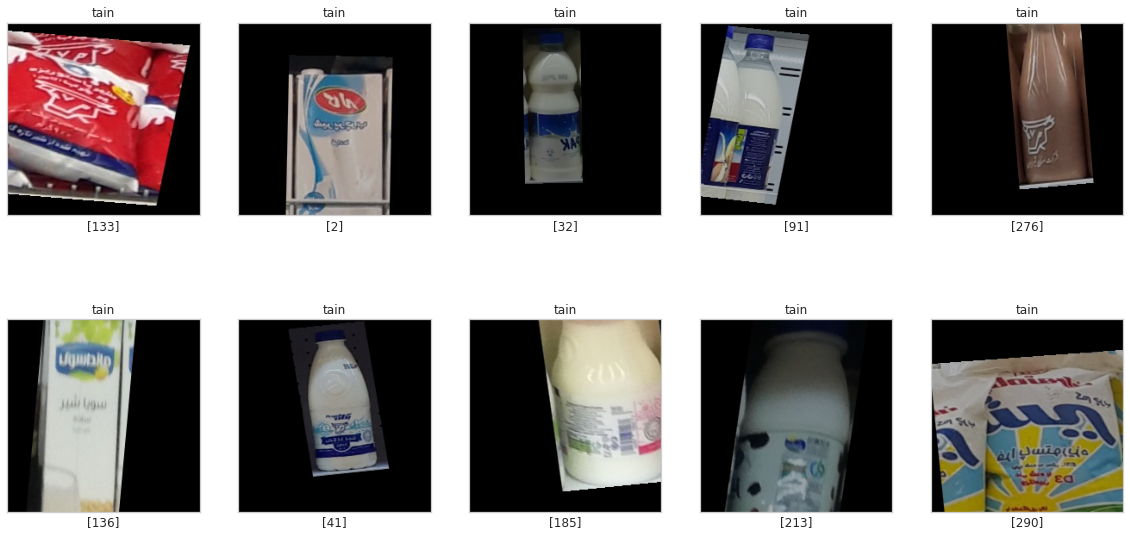

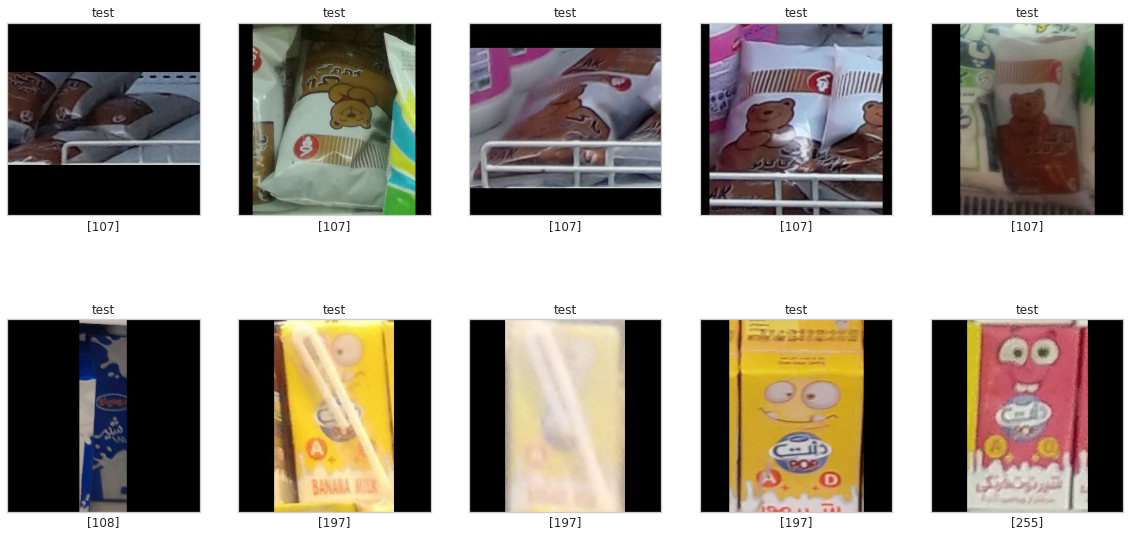

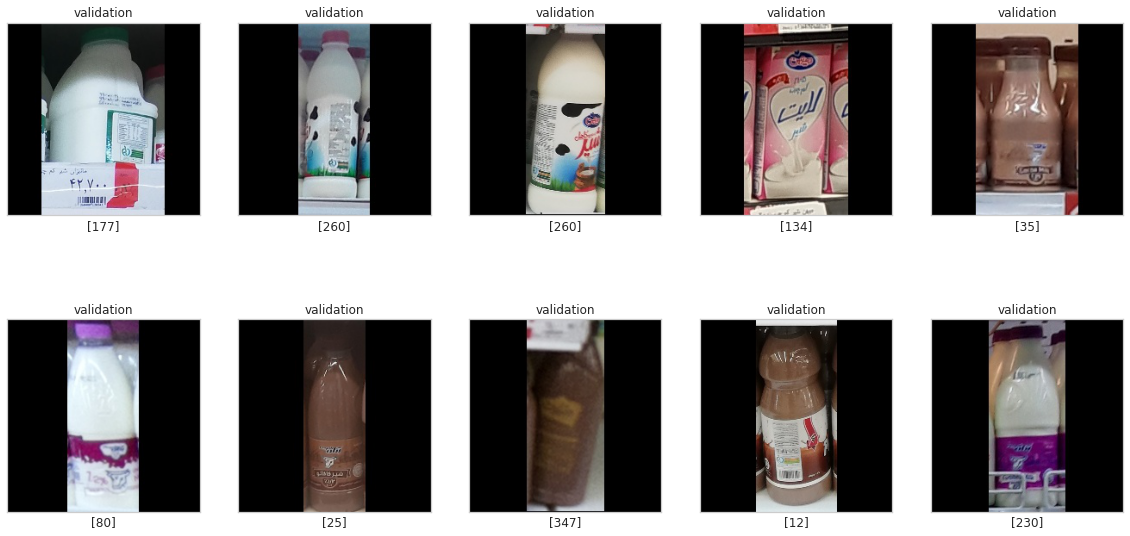

In [30]:
import sys
sys.path.append('../scripts')
from utils.data_loader import load_data_flow_from_dataframe
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn

data_dir = '../data'

data_flow_df = load_data_flow_from_dataframe(
                data_dir,
                (224,224),
                batch_size=1,
                category=category)

def plot_from_flow(flow , howmany, ncols, title=''):
    rows = math.ceil(howmany/ncols)
    plt.figure(figsize=(20,rows*5))
    for i in range(howmany):
        plt.subplot(rows,ncols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title(title)
        image , label = flow.__next__()
        image = image.astype(np.uint8)
        plt.imshow(image[0,...],
                  )
        plt.xlabel(np.argmax(label, axis=1))
    plt.show()
plot_from_flow(data_flow_df['train'], 10, 5, 'tain')

plot_from_flow(data_flow_df['test'], 10, 5, 'test')

plot_from_flow(data_flow_df['validation'], 10, 5, 'validation')

# evaluate save models 

In [31]:
from tensorflow.keras.models import load_model
import pandas as pd
from pathlib import Path
from itertools import islice

In [ ]:
seaborn.set(rc={'axes.facecolor':'#eeeeee', 'figure.facecolor':'#eeeeee'})

In [32]:
BASE = Path(f'/workspace/detect-me/product_classifier/saved_models/{category}/')

!ls $BASE

densenet121  efficientnetb7	  resnet152v2  resnet50v2	 test_result
densenet201  inception_resnet_v2  resnet50     tensorboard_logs  vgg16


In [76]:
tag = '020035'

In [77]:
model_path = list(Path(BASE / 'resnet152v2').glob(f'*{tag}'))[0]

In [78]:
def load_model_with_info(model_path):
    csv = pd.read_csv(model_path/  'label_mapping.csv')
    train_count =\
        pd.read_csv(model_path / 'train_info.csv',
                              index_col=0,
                              names = ['code', 'count'])
    train_count = train_count.reset_index().dropna().drop('index',axis=1)

    joind_train_info = train_count.set_index('code').join(csv.set_index('CODE'))
    joind_train_info.index.name = 'label-code'
    joind_train_info = joind_train_info.reset_index()

    model = load_model(model_path)
    return model ,  joind_train_info

In [79]:
model, train_info = load_model_with_info(model_path)

In [95]:
y_test = data_flow_df['test'].classes
y_train = data_flow_df['train'].classes

counts_train = np.unique(y_train,
                        return_counts=True)
df_train= pd.DataFrame(counts_train).T
df_train.columns = ['label', 'count_in_trainset']
df_train = df_train.set_index('label')


# PREDICT ##
y_pred = model.predict(data_flow_df['test'])
y_pred = np.argmax(y_pred,axis=1)

In [209]:
wrong_preds = pd.DataFrame({'true_label' : np.array(y_test)[y_pred != y_test],
                           'wrong_pred' : y_pred[y_pred != y_test]})
wrong_preds.head(1)

,true_label,wrong_pred
0,108,111


# sklearn confusion_matrix

In [259]:
from sklearn.metrics import confusion_matrix
labels_ = sorted(list(set([*wrong_preds['true_label'],*wrong_preds['wrong_pred']])))
cm = confusion_matrix(wrong_preds['true_label'],
                      wrong_preds['wrong_pred'],
                      labels=labels_
                     )

In [260]:
b=cm.sum(axis=1).reshape(-1,1)
cm_p = np.divide(cm,
              b,
#               out=np.zeros_like(cm),
              where=b!=0
             )

In [261]:
cm_p = np.round(cm_p,3)

In [262]:
annot = np.where(cm_p==0, np.nan, cm_p)

Text(241.5, 0.5, 'true labels')

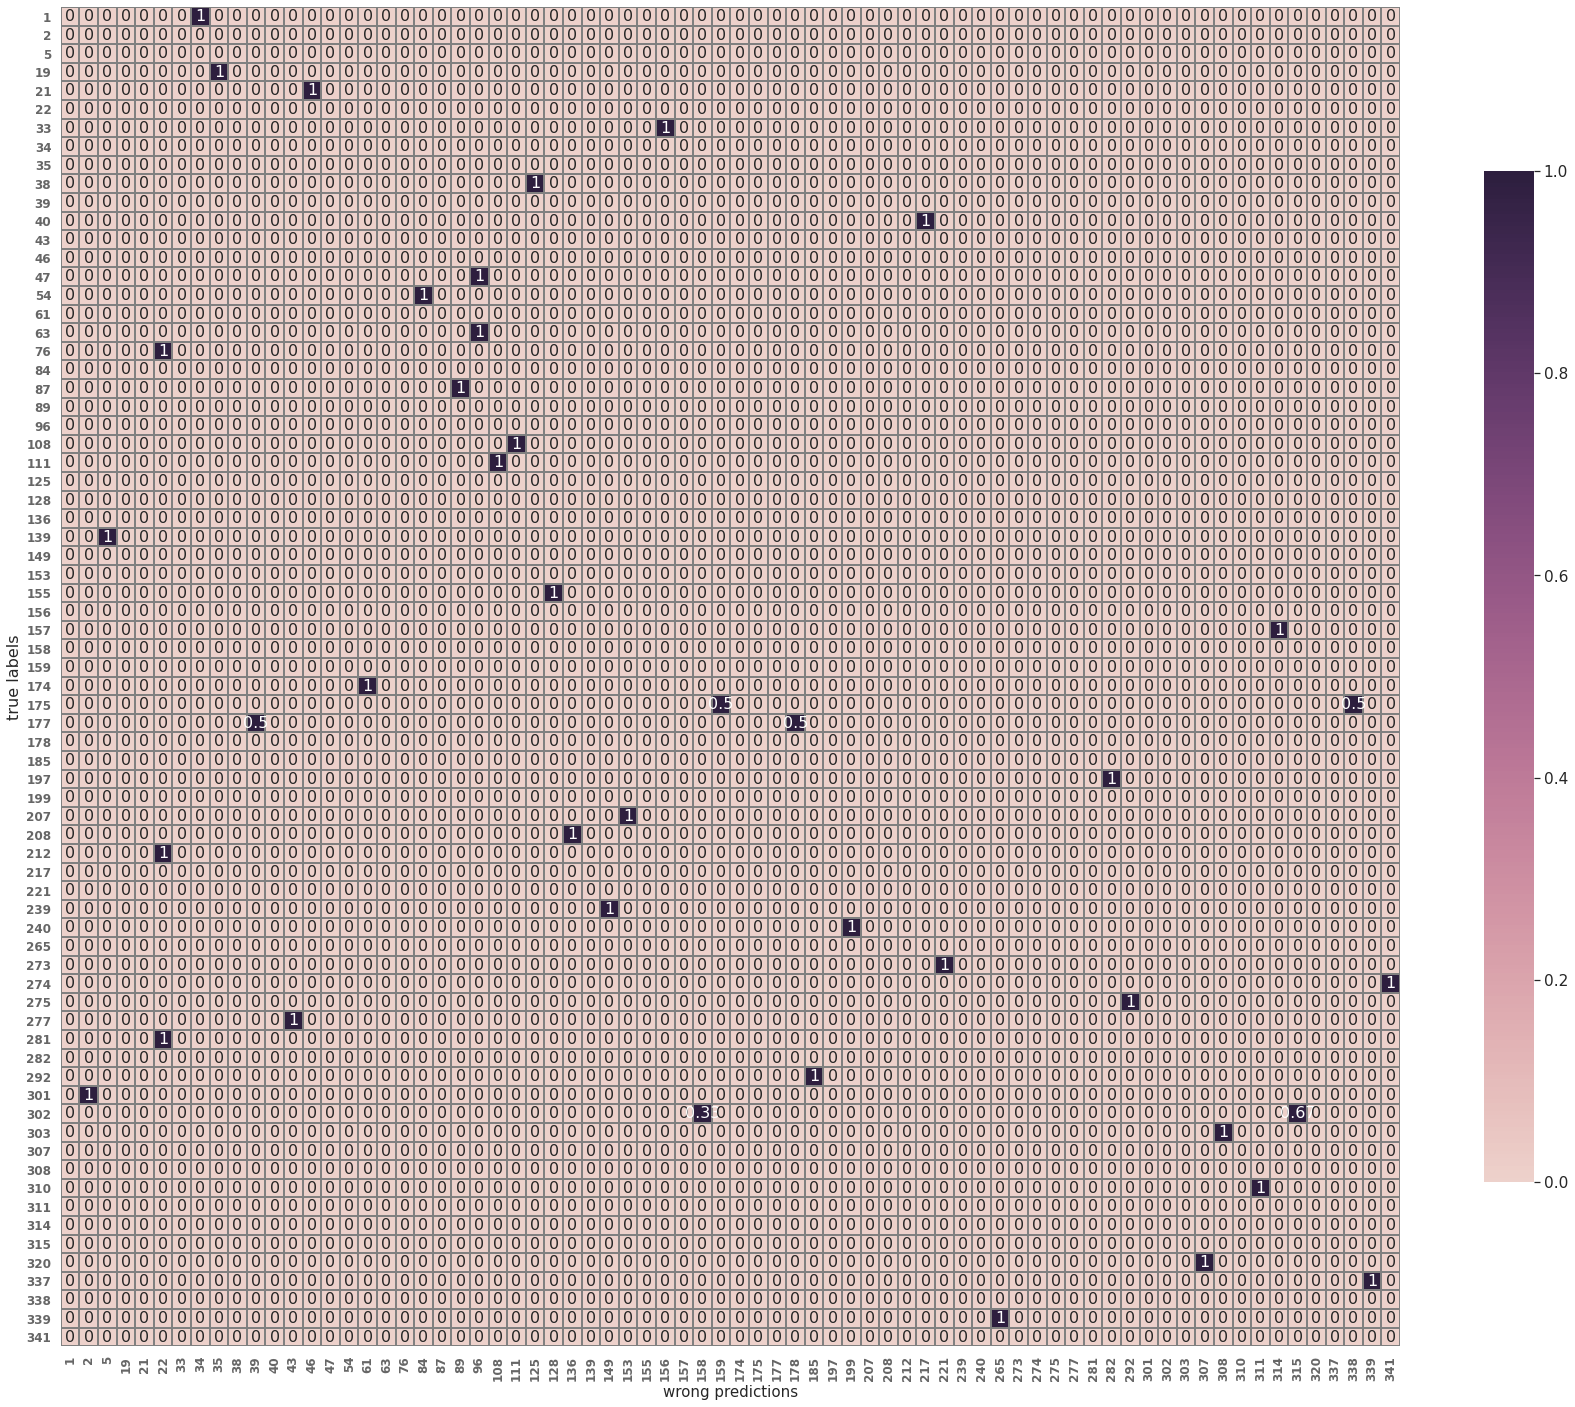

In [270]:
fig , ax = plt.subplots(1,1, figsize=(30,30))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm,
#             mask=cm_p <= 0,
            annot=cm_p,
            xticklabels = labels_,
            linewidths = 2,
            square=True,
#             cmap="viridis_r",
            cmap=sns.cubehelix_palette(as_cmap=True),
            linecolor='gray',
            vmin= 0,
            vmax=1,
            yticklabels= labels_,
            annot_kws={"size": 16},
            cbar_kws={"shrink": .62},
           ax=ax) # font size
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=90,
              fontsize = 12,
                 color='#666666',
                  fontweight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),
                   rotation=0,
                  fontsize = 12,
                   color='#666666',
                  fontweight = 'bold')
ax.set_xlabel('wrong predictions',
                           fontsize = 15,)
ax.set_ylabel('true labels',
                           fontsize = 16,)

# sklearn classification_report

In [100]:
report = classification_report(y_test,
                               y_pred,
                               zero_division=0,
                              output_dict=True)

report_test = pd.DataFrame(report).T

classes = data_flow_df['train'].classes
classes = [str(x) for x in classes]

report_test = report_test.loc[report_test.index.isin(set(classes))]
report_test.index = report_test.index.astype(int)

train_info = train_info.set_index('label-code')

join_result = report_test.join(df_train).join(train_info)
join_result.head(2)

,precision,recall,f1-score,support,count_in_trainset,count,CLASS
1,1.000000,0.666667,0.8,3.0,80,80,106667
2,0.666667,1.000000,0.8,2.0,48,48,106668


In [118]:
cols = ['CLASS', 'recall', 'f1-score', 'precision', 'support']

In [119]:
harvest = join_result[cols]
# harvest = harvest.set_index('CLASS')
harvest = harvest.sort_values(['recall', 'precision'])
parts = np.array_split(harvest,5)

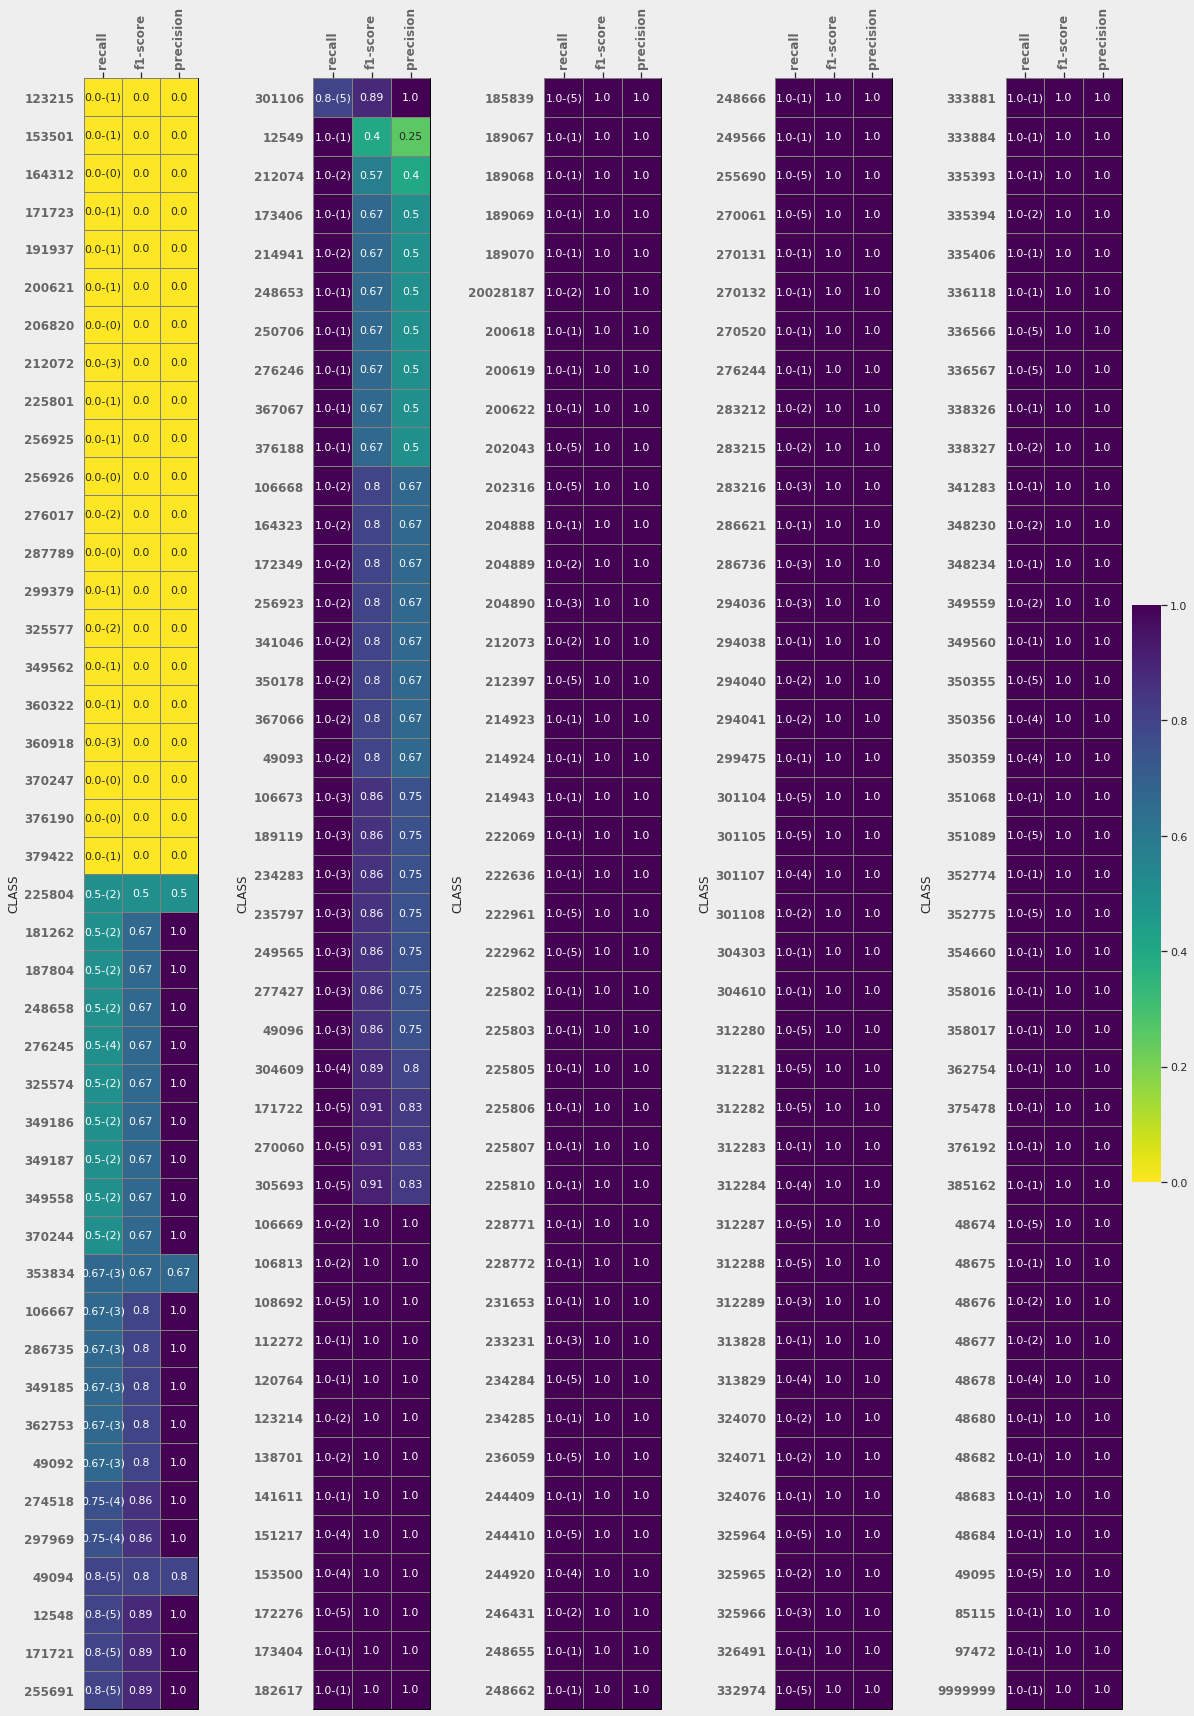

In [194]:
f, axes = plt.subplots(1,5,figsize=(20,30))

for i, (ax , part) in enumerate(zip(axes.flatten(), parts)):
    cbar = True if i==4 else False
    part = part.set_index('CLASS')
    annot = part.iloc[:,:-1].round(2).astype(str)
    annot['recall'] = annot['recall'] + '-('+ part['support'].astype(int).astype(str) +')'
    sns.heatmap(data = part.iloc[:,:-1],
                square=True,
                annot=annot,
                cbar=cbar,
                linewidths=.5,
#                 fmt=':.2d',
                ax =ax,
                vmax=1,
                vmin=0,
                annot_kws={'fontsize':11},
                cmap="viridis_r",
                linecolor='gray',
                fmt=''
               )
    ax.patch.set_edgecolor('black') 
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=90,
                  fontsize = 12,
                     color='#666666',
                      fontweight = 'bold')
    ax.set_yticklabels(ax.get_yticklabels(),
                       rotation=0,
                      fontsize = 12,
                       color='#666666',
                      fontweight = 'bold')
    ax.xaxis.tick_top()
    ax.patch.set_linewidth('1')  

***

***

***

***

***

# api service 

In [6]:
from keras.preprocessing.image import img_to_array
import flask
from pathlib import Path
from tensorflow.keras.models import load_model
import io
from PIL import Image
import numpy as np
import pandas as pd 

app = flask.Flask(__name__)
product_classifier_model = None
product_detection_model = None


# product_detection

# product_classifier
BASE = Path('/workspace/detect-me/product_classifier/saved_models/by_category/')
model_path = list(Path(BASE / 'densenet121').glob('*231339'))[0]

def load_model_to_infer(model_path):
    global model
    model = load_model(model_path)

def get_train_info(model_path):
    csv = pd.read_csv(model_path/  'label_mapping.csv')
    train_count =\
        pd.read_csv(model_path / 'train_info.csv',
                              index_col=0,
                              names = ['code', 'count'])
    train_count = train_count.reset_index().dropna().drop('index',axis=1)

    joind_train_info = train_count.set_index('code').join(csv.set_index('CODE'))
    joind_train_info.index.name = 'label-code'
    joind_train_info = joind_train_info.reset_index()
    return joind_train_info

def prepare_image(image, target):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
#     image = imagenet_utils.preprocess_input(image)

    # return the processed image
    return image

def post_prediction(preds, info):
    return info[info['label-code'] == np.argmax(preds)]

@app.route("/predict", methods=["POST"])
def predict():
    # initialize the data dictionary that will be returned from the
    # view
#     data = {"success": False}

    # ensure an image was properly uploaded to our endpoint
    if flask.request.method == "POST":
        if flask.request.files.get("image"):
            # read the image in PIL format
            image = flask.request.files["image"].read()
            image = Image.open(io.BytesIO(image))

            # preprocess the image and prepare it for classification
            image = prepare_image(image, target=(224, 224))

            # classify the input image and then initialize the list
            # of predictions to return to the client
            preds = model.predict(image)
            info = get_train_info(model_path)
            
            result = post_prediction(preds, info)
            result = result.to_dict()
            result["success"] = True

    # return the data dictionary as a JSON response
    return flask.jsonify(result)

In [ ]:
# curl -X POST -F image=@NotCk_13195.jpg 'http://127.0.0.1:16006/predict'

In [7]:
if __name__ == "__main__":
    print(("* Loading Keras model and Flask starting server..."
        "please wait until server has fully started"))
    model_path = list(Path(BASE / 'densenet121').glob('*231339'))[0]
    load_model_to_infer(model_path)
    app.run(host='0.0.0.0', port=6666)

* Loading Keras model and Flask starting server...please wait until server has fully started
 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://172.17.0.2:6666/ (Press CTRL+C to quit)
172.17.0.2 - - [23/Aug/2021 11:06:44] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2021 11:15:04] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2021 11:15:08] "POST /predict HTTP/1.1" 200 -


---

---

---